# Importing Library

In [43]:
try:
    import os
    import datetime
    import pandas as pd
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:90% !important; }</style>"))
except Exception as e:
    print("Library not found: ",e)

# Config

In [44]:
path = 'data/data.csv'

# Functions

In [45]:
def read_dataset(path):
    '''
    Returns the dataframe, reading from the file with some conditions

    Parameters:
        path (string) : file path name

    Returns:
        df (dataframe): return the dataframe
    '''
    
    df = pd.DataFrame()
    if not os.path.exists(path):
        print("---------- Not exists files ----------")
        sys.exit()
        
    elif os.stat(path).st_size == 0:
        print("---------- Empty File ----------")
        sys.exit()
    
    else:
        #read the dataset
        print("---------- Reading the file ----------")
        df = pd.read_csv(path,encoding='windows-1252',parse_dates=['InvoiceDate'])
    return df

In [46]:
df = read_dataset(path)
df

---------- Reading the file ----------


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Attribute Information:

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

# RFM -> Receny, Frequency, Monetary

Recency: last purchase

Frequency: how many purchase

Monetary: Money

In [47]:
df = df[['InvoiceDate','CustomerID','UnitPrice']]
df

,InvoiceDate,CustomerID,UnitPrice
0,2010-12-01 08:26:00,17850.0,2.55
1,2010-12-01 08:26:00,17850.0,3.39
2,2010-12-01 08:26:00,17850.0,2.75
3,2010-12-01 08:26:00,17850.0,3.39
4,2010-12-01 08:26:00,17850.0,3.39
...,...,...,...
541904,2011-12-09 12:50:00,12680.0,0.85
541905,2011-12-09 12:50:00,12680.0,2.10
541906,2011-12-09 12:50:00,12680.0,4.15
541907,2011-12-09 12:50:00,12680.0,4.15


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  541909 non-null  datetime64[ns]
 1   CustomerID   406829 non-null  float64       
 2   UnitPrice    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 12.4 MB


In [49]:
#Customer frequency with more than 5 transaction
frequency_customer = df['CustomerID'].value_counts().rename_axis('CustomerID').to_frame('frequency').reset_index(drop=False)
frequency_customer

,CustomerID,frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
...,...,...
4367,13391.0,1
4368,16579.0,1
4369,13366.0,1
4370,17763.0,1


In [50]:
#customer which has more than 5 transactions
more_than_5_transaction_customers = list(frequency_customer[frequency_customer['frequency'] >5]['CustomerID'])
more_than_5_transaction_customers

[17841.0,
 14911.0,
 14096.0,
 12748.0,
 14606.0,
 15311.0,
 14646.0,
 13089.0,
 13263.0,
 14298.0,
 15039.0,
 14156.0,
 18118.0,
 14159.0,
 14796.0,
 15005.0,
 16033.0,
 14056.0,
 14769.0,
 17511.0,
 13081.0,
 14527.0,
 16549.0,
 14456.0,
 15719.0,
 15555.0,
 16931.0,
 17811.0,
 14505.0,
 12415.0,
 17338.0,
 18283.0,
 17757.0,
 12921.0,
 17675.0,
 15159.0,
 16764.0,
 16904.0,
 13137.0,
 15547.0,
 16923.0,
 17920.0,
 17735.0,
 15529.0,
 16360.0,
 16729.0,
 16241.0,
 15856.0,
 12681.0,
 13969.0,
 16713.0,
 14502.0,
 14415.0,
 13230.0,
 13098.0,
 14194.0,
 14088.0,
 16686.0,
 13694.0,
 17611.0,
 14667.0,
 17238.0,
 17602.0,
 15023.0,
 15358.0,
 15993.0,
 14534.0,
 12867.0,
 17337.0,
 15861.0,
 16910.0,
 17231.0,
 14367.0,
 12471.0,
 12682.0,
 15498.0,
 15356.0,
 17059.0,
 15033.0,
 15998.0,
 14895.0,
 14049.0,
 17346.0,
 16161.0,
 13668.0,
 13408.0,
 14730.0,
 13319.0,
 15640.0,
 17954.0,
 17315.0,
 17139.0,
 12540.0,
 15021.0,
 16558.0,
 12621.0,
 18041.0,
 17220.0,
 18069.0,
 13069.0,


In [51]:
#merge with the real data
df = df.query("CustomerID in @more_than_5_transaction_customers").reset_index(drop=True)
df

,InvoiceDate,CustomerID,UnitPrice
0,2010-12-01 08:26:00,17850.0,2.55
1,2010-12-01 08:26:00,17850.0,3.39
2,2010-12-01 08:26:00,17850.0,2.75
3,2010-12-01 08:26:00,17850.0,3.39
4,2010-12-01 08:26:00,17850.0,3.39
...,...,...,...
405943,2011-12-09 12:50:00,12680.0,0.85
405944,2011-12-09 12:50:00,12680.0,2.10
405945,2011-12-09 12:50:00,12680.0,4.15
405946,2011-12-09 12:50:00,12680.0,4.15


In [52]:
df.query(" CustomerID == '17846.0'")

,InvoiceDate,CustomerID,UnitPrice


In [53]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%y')
df

,InvoiceDate,CustomerID,UnitPrice
0,2010-12-01 08:26:00,17850.0,2.55
1,2010-12-01 08:26:00,17850.0,3.39
2,2010-12-01 08:26:00,17850.0,2.75
3,2010-12-01 08:26:00,17850.0,3.39
4,2010-12-01 08:26:00,17850.0,3.39
...,...,...,...
405943,2011-12-09 12:50:00,12680.0,0.85
405944,2011-12-09 12:50:00,12680.0,2.10
405945,2011-12-09 12:50:00,12680.0,4.15
405946,2011-12-09 12:50:00,12680.0,4.15


In [54]:
##########RFM############ -> Mean -> Min -> Max -> Std.dev
#recency

current_date = max(df['InvoiceDate']) + datetime.timedelta(days=1)

recency_merchant = df.pivot_table(index='CustomerID'
                                  , aggfunc={'InvoiceDate': 'max'}).reset_index().rename(columns={'InvoiceDate': 'max_date'})

recency_merchant['recency'] = recency_merchant.apply(lambda row:  (current_date - row['max_date']).total_seconds() / 60 / 60, axis=1)

In [55]:
#frequency
df['Created_Time_prev'] = df.sort_values(['InvoiceDate', 'CustomerID'], ascending=True).groupby('CustomerID')['InvoiceDate'].shift(1)

df['hour_diff'] = df.apply(lambda row: (row['InvoiceDate'] - row['Created_Time_prev']).total_seconds() / 60 / 60 ,axis=1) 

df['hour_diff' + '_mean'], df['hour_diff' + '_std'], df['hour_diff' + '_count'] = df['hour_diff'], df['hour_diff'], df['CustomerID']

frequency_merchant = df.pivot_table(index='CustomerID', 
                                    aggfunc={'hour_diff' + '_mean': 'mean', 'hour_diff' + '_std': 'std', 'hour_diff' + '_count': 'count'}).reset_index().rename(columns={"hour_diff_mean": 'frequency'})

In [56]:
#monetary median
monetary_merchant = df.pivot_table(index='CustomerID', aggfunc={'UnitPrice': 'median'}).reset_index().rename(columns={'UnitPrice': 'monetary'})
monetary_merchant

,CustomerID,monetary
0,12347.0,2.015
1,12348.0,0.550
2,12349.0,2.550
3,12350.0,1.650
4,12352.0,3.950
...,...,...
4060,18280.0,3.750
4061,18281.0,1.650
4062,18282.0,2.950
4063,18283.0,1.650


# Adding common statistical features 

In [57]:
#mean
monetary_merchant_mean = df.pivot_table(index='CustomerID', 
                                          aggfunc={'UnitPrice': 'mean'}).reset_index().rename(columns={'UnitPrice': 'monetary_mean'})
monetary_merchant_mean

,CustomerID,monetary_mean
0,12347.0,2.644011
1,12348.0,5.764839
2,12349.0,8.289041
3,12350.0,3.841176
4,12352.0,23.274737
...,...,...
4060,18280.0,4.765000
4061,18281.0,5.622857
4062,18282.0,4.821538
4063,18283.0,1.614987


In [58]:
#min
monetary_merchant_min = df.pivot_table(index='CustomerID', 
                                         aggfunc={'UnitPrice': 'min'}).reset_index().rename(columns={'UnitPrice': 'monetary_min'})
monetary_merchant_min

,CustomerID,monetary_min
0,12347.0,0.25
1,12348.0,0.29
2,12349.0,0.42
3,12350.0,0.85
4,12352.0,0.65
...,...,...
4060,18280.0,2.55
4061,18281.0,0.42
4062,18282.0,0.29
4063,18283.0,0.29


In [59]:
#max
monetary_merchant_max = df.pivot_table(index='CustomerID', 
                                aggfunc={'UnitPrice': 'max'}).reset_index().rename(columns={'UnitPrice': 'monetary_max'})
monetary_merchant_max

,CustomerID,monetary_max
0,12347.0,12.75
1,12348.0,40.00
2,12349.0,300.00
3,12350.0,40.00
4,12352.0,376.50
...,...,...
4060,18280.0,9.95
4061,18281.0,16.95
4062,18282.0,12.75
4063,18283.0,15.95


In [60]:
#std
monetary_merchant_std = df.pivot_table(index='CustomerID', 
                                aggfunc={'UnitPrice': 'std'}).reset_index().rename(columns={'UnitPrice': 'monetary_std'})
monetary_merchant_std

,CustomerID,monetary_std
0,12347.0,2.255381
1,12348.0,13.400323
2,12349.0,35.028021
3,12350.0,9.334751
4,12352.0,70.438671
...,...,...
4060,18280.0,2.472072
4061,18281.0,7.778641
4062,18282.0,4.862801
4063,18283.0,1.096060


In [61]:
#concat
rfm = pd.concat([frequency_merchant["frequency"],monetary_merchant,monetary_merchant_mean["monetary_mean"],monetary_merchant_min["monetary_min"],monetary_merchant_max["monetary_max"],monetary_merchant_std["monetary_std"],recency_merchant['recency']],axis=1)
rfm

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency
0,48.402855,12347.0,2.015,2.644011,0.25,12.75,2.255381,68.966667
1,226.202222,12348.0,0.550,5.764839,0.29,40.00,13.400323,1823.616667
2,0.000000,12349.0,2.550,8.289041,0.42,300.00,35.028021,458.983333
3,0.000000,12350.0,1.650,3.841176,0.85,40.00,9.334751,7460.816667
4,66.404965,12352.0,3.950,23.274737,0.65,376.50,70.438671,886.216667
...,...,...,...,...,...,...,...,...
4060,0.000000,18280.0,3.750,4.765000,2.55,9.95,2.472072,6674.966667
4061,0.000000,18281.0,1.650,5.622857,0.42,16.95,7.778641,4345.950000
4062,237.844444,18282.0,2.950,4.821538,0.29,12.75,4.862801,193.116667
4063,10.614305,18283.0,1.650,1.614987,0.29,15.95,1.096060,96.800000


In [62]:
df_GMM = rfm.copy()
df_GMM

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency
0,48.402855,12347.0,2.015,2.644011,0.25,12.75,2.255381,68.966667
1,226.202222,12348.0,0.550,5.764839,0.29,40.00,13.400323,1823.616667
2,0.000000,12349.0,2.550,8.289041,0.42,300.00,35.028021,458.983333
3,0.000000,12350.0,1.650,3.841176,0.85,40.00,9.334751,7460.816667
4,66.404965,12352.0,3.950,23.274737,0.65,376.50,70.438671,886.216667
...,...,...,...,...,...,...,...,...
4060,0.000000,18280.0,3.750,4.765000,2.55,9.95,2.472072,6674.966667
4061,0.000000,18281.0,1.650,5.622857,0.42,16.95,7.778641,4345.950000
4062,237.844444,18282.0,2.950,4.821538,0.29,12.75,4.862801,193.116667
4063,10.614305,18283.0,1.650,1.614987,0.29,15.95,1.096060,96.800000


In [63]:
#importing library 
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

#Make it array
X = df_GMM[['recency','frequency','monetary','monetary_mean','monetary_min','monetary_max','monetary_std']].values
#Gaussian Mixture
gmm = GaussianMixture(n_components=5,covariance_type='spherical').fit(X)
labels = gmm.predict(X)
score = gmm.predict_proba(X)
df_GMM['labels'] = labels

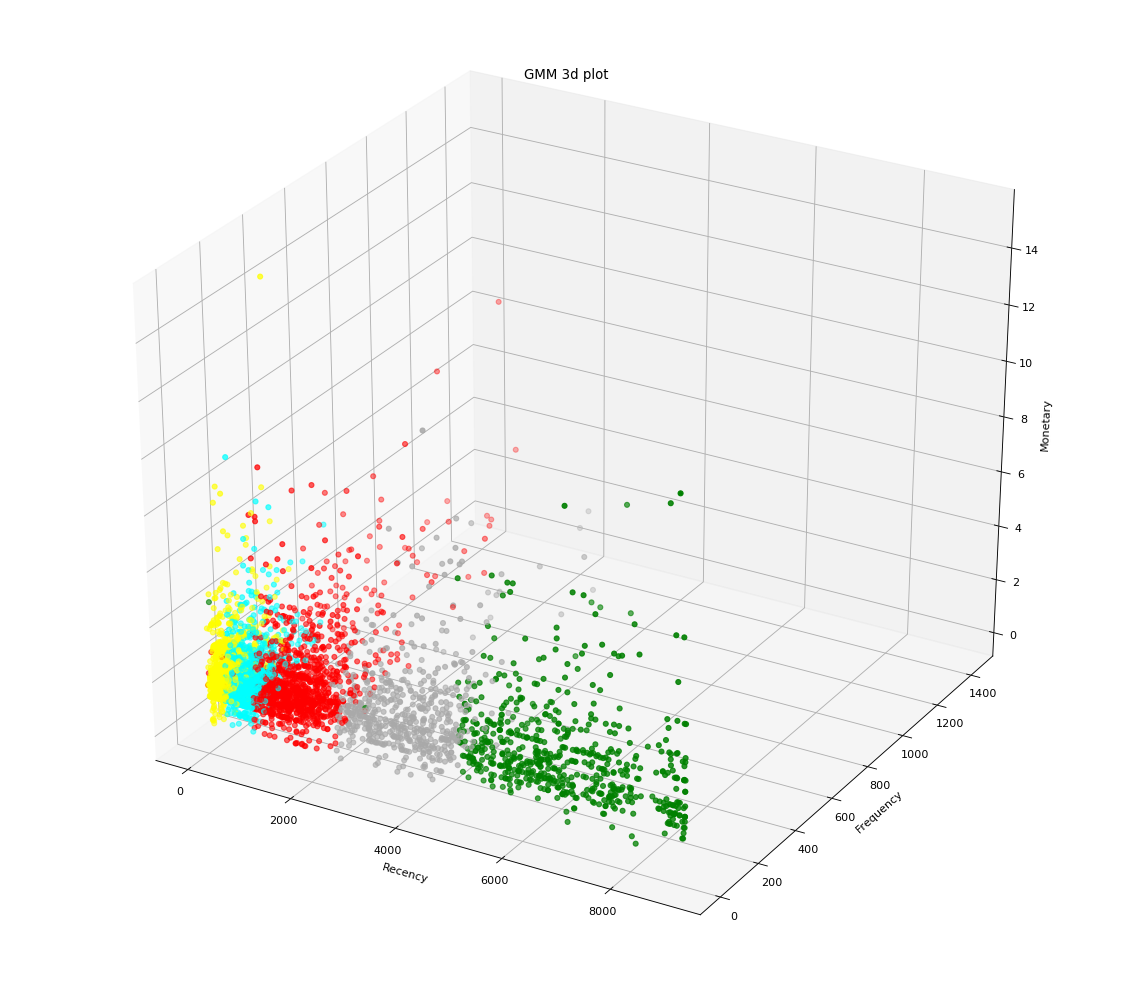

In [64]:
def three_d_plot(data1,data2,data3,data4):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib
    #fig = plt.figure()
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    colors = ['aqua', 'darkgray', 'blue', 'red', 'black', 'yellow', 'green']   
    #ax.scatter(data1,data2,data3, color="black")
    #ax.scatter(data4,data5,data6, color="red", s=150)
    #ax.scatter(data1,data2,data3, s=100, edgecolor="r", facecolor="gold")
    ax.scatter(data1,data2,data3, c=data4, cmap=matplotlib.colors.ListedColormap(colors))
    #plt.legend(loc=2)
    plt.title("GMM 3d plot")
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    plt.show()

three_d_plot(df_GMM["recency"],df_GMM["frequency"],df_GMM["monetary"],df_GMM["labels"])

In [65]:
#Score adding
scores = pd.DataFrame(score)
scores.rename(columns = {0:'label_zero',1:'label_one',2:'label_two',3:'label_three'}, inplace = True)
#Reset Index
df_GMM = df_GMM.reset_index(drop=True)
scores = scores.reset_index(drop=True)
#merge two dataframe
gmm_score = pd.concat([df_GMM,scores],axis=1)
    
del df_GMM,scores

In [66]:
#label_zero
label_zero = gmm_score.query("labels == 0").sort_values("label_zero").reset_index(drop=True)
label_zero = label_zero.drop(columns=['label_one','label_two','label_three'])
label_zero=label_zero.rename(columns = {'label_zero':'score'})
#label_one
label_one = gmm_score.query("labels == 1").sort_values("label_one").reset_index(drop=True)
label_one = label_one.drop(columns=['label_zero','label_two','label_three'])
label_one=label_one.rename(columns = {'label_one':'score'})
#label_two
label_two = gmm_score.query("labels == 2").sort_values("label_two").reset_index(drop=True)
label_two = label_two.drop(columns=['label_zero','label_one','label_three'])
label_two=label_two.rename(columns = {'label_two':'score'})
#label_three
label_three = gmm_score.query("labels == 3").sort_values("label_three").reset_index(drop=True)
label_three = label_three.drop(columns=['label_zero','label_one','label_two'])
label_three=label_three.rename(columns = {'label_three':'score'})
#merging labels
frames = [label_zero,label_one,label_two,label_three]
vertical_stack = pd.concat(frames, axis=0).reset_index(drop=True)

In [67]:
vertical_stack

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency,labels,score,4
0,85.833152,17999.0,1.950,2.822903,0.19,16.95,2.630040,908.900000,0,0.518606,5.997538e-28
1,173.411290,15651.0,1.720,2.158437,0.29,4.95,1.656754,892.150000,0,0.525283,5.445963e-28
2,454.634375,16660.0,1.650,2.576471,0.83,5.95,1.848604,405.950000,0,0.653050,7.557999e-28
3,26.314657,15521.0,1.650,4.004600,0.39,125.00,12.692566,886.966667,0,0.677368,4.178221e-28
4,7.383533,16729.0,1.650,2.333982,0.12,125.00,5.103011,881.650000,0,0.737586,3.424622e-28
...,...,...,...,...,...,...,...,...,...,...,...
3435,57.171264,13954.0,3.850,6.062000,0.39,16.95,5.736601,48.000000,3,1.000000,1.325791e-40
3436,38.482975,17405.0,2.550,3.160638,0.29,16.95,3.379521,43.633333,3,1.000000,1.700271e-40
3437,75.876844,13890.0,3.750,3.461140,0.29,12.75,2.054322,45.233333,3,1.000000,1.679090e-40
3438,44.471066,17091.0,2.080,3.218283,0.29,19.95,2.526172,74.116667,3,1.000000,5.992955e-41


In [68]:
#MinMax Scaling for scoring
vertical_stack_scaling = vertical_stack[['score']]

In [69]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_scores = scaler.fit_transform(vertical_stack_scaling)
dataset_scaled_scores = pd.DataFrame(scaled_scores)

In [70]:
dataset_scaled_scores.rename(columns = {0:'score'}, inplace = True)
#optional 
dataset_scaled_scores['score'] = 1 - dataset_scaled_scores['score']
#Drop unnecessary columns
drop_elements = ['score']
vertical_stack = vertical_stack.drop(drop_elements, axis=1)

In [71]:
#Merge
result = pd.concat([dataset_scaled_scores,vertical_stack],axis=1)
    
#Reorder df
del dataset_scaled_scores,vertical_stack
result = result[['CustomerID','recency','frequency','monetary','monetary_mean','monetary_min','monetary_max','monetary_std','labels','score']]
result

,CustomerID,recency,frequency,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,labels,score
0,17999.0,908.900000,85.833152,1.950,2.822903,0.19,16.95,2.630040,0,9.652310e-01
1,15651.0,892.150000,173.411290,1.720,2.158437,0.29,4.95,1.656754,0,9.518435e-01
2,16660.0,405.950000,454.634375,1.650,2.576471,0.83,5.95,1.848604,0,6.956608e-01
3,15521.0,886.966667,26.314657,1.650,4.004600,0.39,125.00,12.692566,0,6.469004e-01
4,16729.0,881.650000,7.383533,1.650,2.333982,0.12,125.00,5.103011,0,5.261589e-01
...,...,...,...,...,...,...,...,...,...,...
3435,13954.0,48.000000,57.171264,3.850,6.062000,0.39,16.95,5.736601,3,2.842171e-14
3436,17405.0,43.633333,38.482975,2.550,3.160638,0.29,16.95,3.379521,3,2.842171e-14
3437,13890.0,45.233333,75.876844,3.750,3.461140,0.29,12.75,2.054322,3,2.842171e-14
3438,17091.0,74.116667,44.471066,2.080,3.218283,0.29,19.95,2.526172,3,2.842171e-14


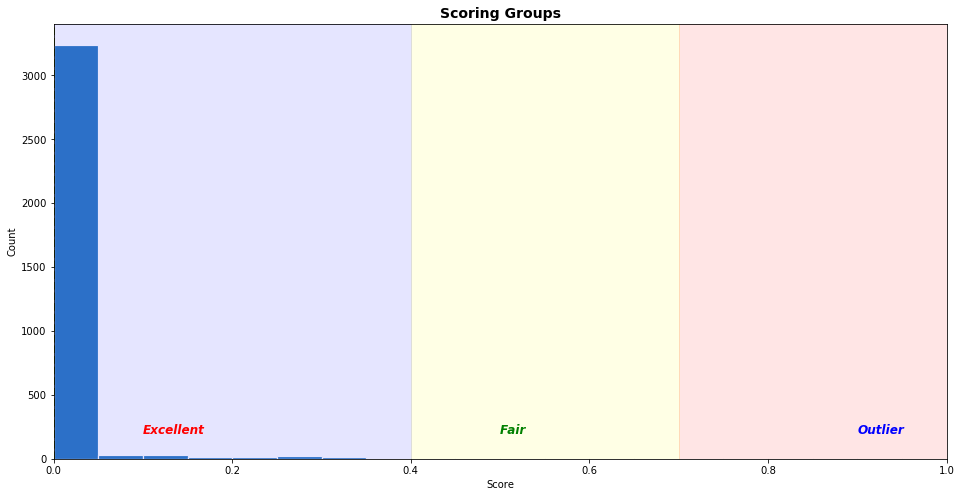

In [74]:
# Add Scoring Groups to Plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,8))

plt.hist(result['score'],
         bins=20,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

plt.xlim(0,1)
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(result['score'],25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(result['score'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(result['score'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)

# Text
plt.text(0.10, 200, 'Excellent', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(0.50, 200, 'Fair', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(0.9, 200, 'Outlier', color='blue', fontweight='bold', style='italic', fontsize=12)

#Shading between Percentiles
plt.axvspan(0, 0.40, alpha=0.1, color='blue')
plt.axvspan(0.40, 0.70, alpha=0.1, color='yellow')
plt.axvspan(0.70, 1, alpha=0.1, color='red');